In [45]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings

import warnings

warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

In [46]:
#load the credit score problem dataset

CSdata=pd.read_csv(r"D:\INTERN SHIP\train.csv",header=0)

#copy the file to backup files

CSdata_BK=CSdata.copy()

#display the first 5 records

CSdata.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [47]:
#Checking for duplicated values

CSdata.duplicated().any()

False

In [48]:
#Display the information

CSdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [49]:
CSdata_01=pd.read_csv(r"D:\INTERN SHIP\train.csv",header=0)

#copy the file to backup files

CSdata_01_BK=CSdata_01.copy()

In [50]:
#Deleting the non essential columns

CSdata_01=CSdata_01.drop(['ID','Customer_ID','Month','Name','SSN','Num_Credit_Card','Delay_from_due_date',
                          'Changed_Credit_Limit','Num_Credit_Inquiries','Payment_of_Min_Amount','Monthly_Balance'],axis=1)

CSdata_01.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,23,Scientist,19114.12,1824.843333,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,809.98,26.822620,22 Years and 1 Months,49.574949,80.41529543900253,High_spent_Small_value_payments,Good
1,23,Scientist,19114.12,NaN,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,Good,809.98,31.944960,NaN,49.574949,118.28022162236736,Low_spent_Large_value_payments,Good
2,-500,Scientist,19114.12,NaN,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,Good,809.98,28.609352,22 Years and 3 Months,49.574949,81.699521264648,Low_spent_Medium_value_payments,Good
3,23,Scientist,19114.12,NaN,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,809.98,31.377862,22 Years and 4 Months,49.574949,199.4580743910713,Low_spent_Small_value_payments,Good
4,23,Scientist,19114.12,1824.843333,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,Good,809.98,24.797347,22 Years and 5 Months,49.574949,41.420153086217326,High_spent_Medium_value_payments,Good


In [51]:
#Number of rows and columns

CSdata_01.shape

(100000, 17)

In [52]:
#Display the datatypes

CSdata_01.dtypes

Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Num_of_Delayed_Payment       object
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Credit_Score                 object
dtype: object

In [53]:
#Checking if there are any missing values

CSdata_01.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Num_of_Delayed_Payment       7002
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Credit_Score                    0
dtype: int64

In [54]:
#using KNN Imputer to address the Driver_Age missing values

#KNNImputer(missing_values=np.nan,n_neigbors=5,weight='uniform',metric='nan_euclidean',
#copy=True,add_indicator=False)

from sklearn.impute import KNNImputer

#Creating an object for KNNImputer

imputer_knn=KNNImputer(missing_values=np.nan)

#fill the missing values for 'Monthly_Inhand_Salary

CSdata_01['Monthly_Inhand_Salary']=imputer_knn.fit_transform(CSdata_01[['Monthly_Inhand_Salary']])

CSdata_01['Monthly_Inhand_Salary']=CSdata_01['Monthly_Inhand_Salary'].astype(int)

CSdata_01

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,23,Scientist,19114.12,1824,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,809.98,26.822620,22 Years and 1 Months,49.574949,80.41529543900253,High_spent_Small_value_payments,Good
1,23,Scientist,19114.12,4194,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,Good,809.98,31.944960,NaN,49.574949,118.28022162236736,Low_spent_Large_value_payments,Good
2,-500,Scientist,19114.12,4194,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,Good,809.98,28.609352,22 Years and 3 Months,49.574949,81.699521264648,Low_spent_Medium_value_payments,Good
3,23,Scientist,19114.12,4194,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,809.98,31.377862,22 Years and 4 Months,49.574949,199.4580743910713,Low_spent_Small_value_payments,Good
4,23,Scientist,19114.12,1824,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,Good,809.98,24.797347,22 Years and 5 Months,49.574949,41.420153086217326,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359,4,7,2,"Auto Loan, and Student Loan",7,_,502.38,34.663572,31 Years and 6 Months,35.104023,60.97133255718485,High_spent_Large_value_payments,Poor
99996,25,Mechanic,39628.99,3359,4,7,2,"Auto Loan, and Student Loan",7,_,502.38,40.565631,31 Years and 7 Months,35.104023,54.18595028760385,High_spent_Medium_value_payments,Poor
99997,25,Mechanic,39628.99,3359,4,5729,2,"Auto Loan, and Student Loan",6,Good,502.38,41.255522,31 Years and 8 Months,35.104023,24.02847744864441,High_spent_Large_value_payments,Poor
99998,25,Mechanic,39628.99,3359,4,7,2,"Auto Loan, and Student Loan",NaN,Good,502.38,33.638208,31 Years and 9 Months,35.104023,251.67258219721603,Low_spent_Large_value_payments,Standard


In [55]:
#simpleImputer technique

from sklearn.impute import SimpleImputer

#SimpleImputer(missing_values=nan,startegy='mean',fill_value=None,verbose='deprecated',copy=True,
#add_indicator=False,keep_empty_features=False)

imputer_si=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

CSdata_01['Type_of_Loan'] = imputer_si.fit_transform(CSdata_01[['Type_of_Loan']])
CSdata_01['Num_of_Delayed_Payment'] = imputer_si.fit_transform(CSdata_01[['Num_of_Delayed_Payment']])
CSdata_01['Credit_History_Age'] = imputer_si.fit_transform(CSdata_01[['Credit_History_Age']])
CSdata_01['Amount_invested_monthly'] = imputer_si.fit_transform(CSdata_01[['Amount_invested_monthly']])

CSdata_01

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,23,Scientist,19114.12,1824,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,809.98,26.822620,22 Years and 1 Months,49.574949,80.41529543900253,High_spent_Small_value_payments,Good
1,23,Scientist,19114.12,4194,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",19,Good,809.98,31.944960,15 Years and 11 Months,49.574949,118.28022162236736,Low_spent_Large_value_payments,Good
2,-500,Scientist,19114.12,4194,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,Good,809.98,28.609352,22 Years and 3 Months,49.574949,81.699521264648,Low_spent_Medium_value_payments,Good
3,23,Scientist,19114.12,4194,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,809.98,31.377862,22 Years and 4 Months,49.574949,199.4580743910713,Low_spent_Small_value_payments,Good
4,23,Scientist,19114.12,1824,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",19,Good,809.98,24.797347,22 Years and 5 Months,49.574949,41.420153086217326,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359,4,7,2,"Auto Loan, and Student Loan",7,_,502.38,34.663572,31 Years and 6 Months,35.104023,60.97133255718485,High_spent_Large_value_payments,Poor
99996,25,Mechanic,39628.99,3359,4,7,2,"Auto Loan, and Student Loan",7,_,502.38,40.565631,31 Years and 7 Months,35.104023,54.18595028760385,High_spent_Medium_value_payments,Poor
99997,25,Mechanic,39628.99,3359,4,5729,2,"Auto Loan, and Student Loan",6,Good,502.38,41.255522,31 Years and 8 Months,35.104023,24.02847744864441,High_spent_Large_value_payments,Poor
99998,25,Mechanic,39628.99,3359,4,7,2,"Auto Loan, and Student Loan",19,Good,502.38,33.638208,31 Years and 9 Months,35.104023,251.67258219721603,Low_spent_Large_value_payments,Standard


In [56]:
#Checking if there are any missing values

CSdata_01.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Num_of_Delayed_Payment      0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Credit_Score                0
dtype: int64

In [57]:
#Display the information

CSdata_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     100000 non-null  int32  
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Interest_Rate             100000 non-null  int64  
 6   Num_of_Loan               100000 non-null  object 
 7   Type_of_Loan              100000 non-null  object 
 8   Num_of_Delayed_Payment    100000 non-null  object 
 9   Credit_Mix                100000 non-null  object 
 10  Outstanding_Debt          100000 non-null  object 
 11  Credit_Utilization_Ratio  100000 non-null  float64
 12  Credit_History_Age        100000 non-null  object 
 13  Total_EMI_per_month       100000 non-null  fl

In [58]:
#Checking if there are any duplicated values

CSdata_01.duplicated().any()

False

In [59]:
#Converting 'Age' column to float type and removing all negative and very high age values

CSdata_01 = CSdata_01.dropna()
CSdata_01.drop_duplicates()

CSdata_01['Age'] = CSdata_01['Age'].astype(str).str.replace('_', '')
CSdata_01['Age'] = pd.to_numeric(CSdata_01['Age'], errors='coerce')

CSdata_01 = CSdata_01[CSdata_01['Age'] >= 0]

mask = (CSdata_01['Age'] > 0) & (CSdata_01['Age'] < 100)
CSdata_01 = CSdata_01[mask]

CSdata_01.head(10)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,23,Scientist,19114.12,1824,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,809.98,26.822620,22 Years and 1 Months,49.574949,80.41529543900253,High_spent_Small_value_payments,Good
1,23,Scientist,19114.12,4194,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",19,Good,809.98,31.944960,15 Years and 11 Months,49.574949,118.28022162236736,Low_spent_Large_value_payments,Good
3,23,Scientist,19114.12,4194,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,809.98,31.377862,22 Years and 4 Months,49.574949,199.4580743910713,Low_spent_Small_value_payments,Good
4,23,Scientist,19114.12,1824,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",19,Good,809.98,24.797347,22 Years and 5 Months,49.574949,41.420153086217326,High_spent_Medium_value_payments,Good
5,23,Scientist,19114.12,4194,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,Good,809.98,27.262259,22 Years and 6 Months,49.574949,62.430172331195294,!@9#%8,Good
6,23,Scientist,19114.12,1824,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",8_,Good,809.98,22.537593,22 Years and 7 Months,49.574949,178.3440674122349,Low_spent_Small_value_payments,Good
7,23,Scientist,19114.12,1824,3,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,Good,809.98,23.933795,15 Years and 11 Months,49.574949,24.785216509052056,High_spent_Medium_value_payments,Standard
8,28,_______,34847.84,3037,2,6,1,Credit-Builder Loan,4,Good,605.03,24.464031,26 Years and 7 Months,18.816215,104.291825168246,Low_spent_Small_value_payments,Standard
9,28,Teacher,34847.84,3037,2,6,1,Credit-Builder Loan,1,Good,605.03,38.550848,26 Years and 8 Months,18.816215,40.39123782853101,High_spent_Large_value_payments,Good
10,28,Teacher,34847.84_,3037,2,6,1,Credit-Builder Loan,-1,_,605.03,33.224951,26 Years and 9 Months,18.816215,58.51597569589465,High_spent_Large_value_payments,Standard


In [60]:
#identify the numerical and categorial variables

num_vars=CSdata_01.columns[CSdata_01.dtypes != 'object']
cat_vars=CSdata_01.columns[CSdata_01.dtypes == 'object']
print(num_vars)
print(cat_vars)

Index(['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Interest_Rate',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')
Index(['Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Credit_Score'],
      dtype='object')


In [61]:
#Display 'Occupation' categorical value

CSdata_01['Occupation'].value_counts()

_______          6873
Lawyer           6389
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6110
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6031
Entrepreneur     6015
Doctor           5915
Journalist       5906
Manager          5807
Musician         5760
Writer           5741
Name: Occupation, dtype: int64

In [62]:
#Display unique values

unique_values =CSdata_01['Credit_Score'].unique()
print(unique_values)

unique_values =CSdata_01['Credit_Mix'].unique()
print(unique_values)

unique_values =CSdata_01['Type_of_Loan'].unique()
print(unique_values)

['Good' 'Standard' 'Poor']
['_' 'Good' 'Standard' 'Bad']
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']


In [63]:
#Display information

CSdata_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97223 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       97223 non-null  int64  
 1   Occupation                97223 non-null  object 
 2   Annual_Income             97223 non-null  object 
 3   Monthly_Inhand_Salary     97223 non-null  int32  
 4   Num_Bank_Accounts         97223 non-null  int64  
 5   Interest_Rate             97223 non-null  int64  
 6   Num_of_Loan               97223 non-null  object 
 7   Type_of_Loan              97223 non-null  object 
 8   Num_of_Delayed_Payment    97223 non-null  object 
 9   Credit_Mix                97223 non-null  object 
 10  Outstanding_Debt          97223 non-null  object 
 11  Credit_Utilization_Ratio  97223 non-null  float64
 12  Credit_History_Age        97223 non-null  object 
 13  Total_EMI_per_month       97223 non-null  float64
 14  Amount

In [64]:
#Converting object to int value

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

CSdata_01['Occupation'] = label_encoder.fit_transform(CSdata_01['Occupation'])
CSdata_01['Annual_Income'] = label_encoder.fit_transform(CSdata_01['Annual_Income'])
CSdata_01['Num_of_Loan'] = label_encoder.fit_transform(CSdata_01['Num_of_Loan'])
CSdata_01['Type_of_Loan'] = label_encoder.fit_transform(CSdata_01['Type_of_Loan'])
CSdata_01['Num_of_Delayed_Payment'] = label_encoder.fit_transform(CSdata_01['Num_of_Delayed_Payment'])
CSdata_01['Credit_Mix'] = label_encoder.fit_transform(CSdata_01['Credit_Mix'])
CSdata_01['Outstanding_Debt'] = label_encoder.fit_transform(CSdata_01['Outstanding_Debt'])
CSdata_01['Credit_History_Age'] = label_encoder.fit_transform(CSdata_01['Credit_History_Age'])
CSdata_01['Amount_invested_monthly'] = label_encoder.fit_transform(CSdata_01['Amount_invested_monthly'])
CSdata_01['Payment_Behaviour'] = label_encoder.fit_transform(CSdata_01['Payment_Behaviour'])
#CSdata_01['Monthly_Balance'] = label_encoder.fit_transform(CSdata_01['Monthly_Balance'])
CSdata_01['Credit_Score'] = label_encoder.fit_transform(CSdata_01['Credit_Score'])

In [65]:
#Display data

CSdata_01.head(5)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Interest_Rate,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Credit_Score
0,23,12,5966,1824,3,3,234,128,669,3,12037,26.822620,180,49.574949,79297,3,0
1,23,12,5966,4194,3,3,234,128,178,1,12037,31.944960,86,49.574949,7450,4,0
3,23,12,5966,4194,3,3,234,128,560,1,12037,31.377862,185,49.574949,29520,6,0
4,23,12,5966,1824,3,3,234,128,178,1,12037,24.797347,186,49.574949,53866,2,0
5,23,12,5966,4194,3,3,234,128,560,1,12037,27.262259,187,49.574949,68901,0,0


In [66]:
#Display the information

CSdata_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97223 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       97223 non-null  int64  
 1   Occupation                97223 non-null  int32  
 2   Annual_Income             97223 non-null  int32  
 3   Monthly_Inhand_Salary     97223 non-null  int32  
 4   Num_Bank_Accounts         97223 non-null  int64  
 5   Interest_Rate             97223 non-null  int64  
 6   Num_of_Loan               97223 non-null  int32  
 7   Type_of_Loan              97223 non-null  int32  
 8   Num_of_Delayed_Payment    97223 non-null  int32  
 9   Credit_Mix                97223 non-null  int32  
 10  Outstanding_Debt          97223 non-null  int32  
 11  Credit_Utilization_Ratio  97223 non-null  float64
 12  Credit_History_Age        97223 non-null  int32  
 13  Total_EMI_per_month       97223 non-null  float64
 14  Amount

In [67]:
#Displaying unique values

CSdata_01.nunique()

Age                            45
Occupation                     16
Annual_Income               18812
Monthly_Inhand_Salary        6889
Num_Bank_Accounts             925
Interest_Rate                1708
Num_of_Loan                   418
Type_of_Loan                 6260
Num_of_Delayed_Payment        729
Credit_Mix                      4
Outstanding_Debt            13148
Credit_Utilization_Ratio    97223
Credit_History_Age            404
Total_EMI_per_month         14857
Amount_invested_monthly     88544
Payment_Behaviour               7
Credit_Score                    3
dtype: int64

In [68]:
#Value counts

CSdata_01['Credit_Score'].value_counts()

2    51723
1    28205
0    17295
Name: Credit_Score, dtype: int64

In [69]:
#Displaying unique values

CSdata_01['Credit_Score'].nunique()

3

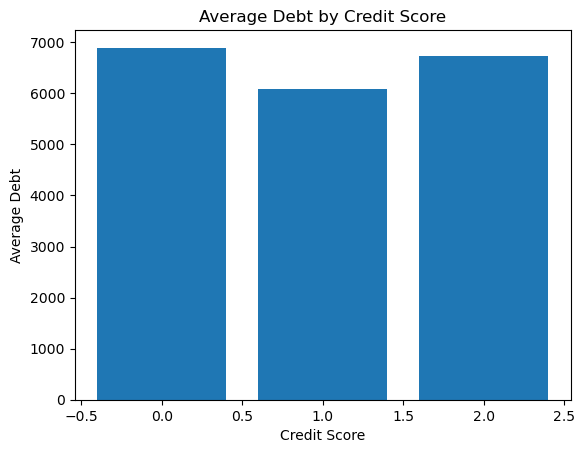

In [72]:
average_debt_by_credit_score = CSdata_01.groupby('Credit_Score')['Outstanding_Debt'].mean()

average_debt_by_credit_score = average_debt_by_credit_score.sort_values(ascending=True)

plt.bar(average_debt_by_credit_score.index, average_debt_by_credit_score.values)
plt.xlabel('Credit Score')
plt.ylabel('Average Debt')
plt.title('Average Debt by Credit Score')



plt.show()

In [73]:
#identify the independent and target (dependent) variables

IndepVar =[]
for col in CSdata_01.columns:
    if col !='Credit_Score':
        IndepVar.append(col)

TargetVar='Credit_Score'

x=CSdata_01[IndepVar]
y=CSdata_01[TargetVar]

In [74]:
#split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#display the shape for train &test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((68056, 16), (29167, 16), (68056,), (29167,))

In [75]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
#x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
#x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

# Multi Label Classifier

[[  443   144   430]
 [  217  3203  2184]
 [ 4417  5175 12954]]
Print Class: 0
TP=443, FN=574, TN=23516, FP=4634
Accuracy: 0.821
Precision: 0.087
Sensitivity: 0.436
F1-Score: 0.145
Specificity: 0.835
Balanced Accuracy: 0.636
MCC: 0.131

Print Class: 1
TP=3203, FN=2401, TN=18244, FP=5319
Accuracy: 0.735
Precision: 0.376
Sensitivity: 0.572
F1-Score: 0.453
Specificity: 0.774
Balanced Accuracy: 0.673
MCC: 0.3

Print Class: 2
TP=12954, FN=9592, TN=4007, FP=2614
Accuracy: 0.582
Precision: 0.832
Sensitivity: 0.575
F1-Score: 0.68
Specificity: 0.605
Balanced Accuracy: 0.59
MCC: 0.151

Overall Performance Prediction:
Accuracy: 71.2667%
Precision: 43.1667%
Recall or Sensitivity: 52.7667%
F1-Score: 0.426
Specificity or True Nagative Rate: 73.8%
Balanced Accuracy: 63.3%

MCC: 0.194

roc_auc_score: 0.693


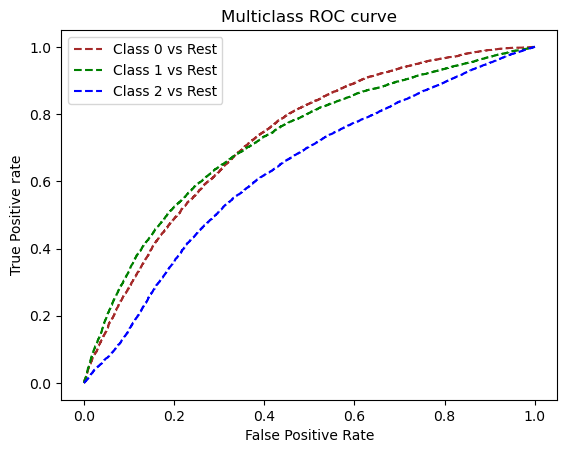

In [76]:

#----- Multi-Label Classification Analysis Code ------------------------------------------------------------------------------------------------------

# To build the 'Multinominal Logistic Regression' model with random sampling

from sklearn.linear_model import LogisticRegression

# Create an object for model

CSdata_01 = LogisticRegression(multi_class='multinomial', penalty='none', solver='newton-cg', random_state=0)

# Train the model with training data

CSdata_01 = CSdata_01.fit(x_train,y_train)

# Predict the model with test data set

y_pred = CSdata_01.predict(x_test)
y_pred_prob = CSdata_01.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# Decision Tree Classifier

[[ 2843   379  1861]
 [  358  5613  2498]
 [ 1876  2530 11209]]
Print Class: 0
TP=2843, FN=2240, TN=21850, FP=2234
Accuracy: 0.847
Precision: 0.56
Sensitivity: 0.559
F1-Score: 0.56
Specificity: 0.907
Balanced Accuracy: 0.733
MCC: 0.467

Print Class: 1
TP=5613, FN=2856, TN=17789, FP=2909
Accuracy: 0.802
Precision: 0.659
Sensitivity: 0.663
F1-Score: 0.661
Specificity: 0.859
Balanced Accuracy: 0.761
MCC: 0.521

Print Class: 2
TP=11209, FN=4406, TN=9193, FP=4359
Accuracy: 0.699
Precision: 0.72
Sensitivity: 0.718
F1-Score: 0.719
Specificity: 0.678
Balanced Accuracy: 0.698
MCC: 0.396

Overall Performance Prediction:
Accuracy: 78.2667%
Precision: 64.6333%
Recall or Sensitivity: 64.6667%
F1-Score: 0.6467
Specificity or True Nagative Rate: 81.4667%
Balanced Accuracy: 73.0667%

MCC: 0.4613

roc_auc_score: 0.729


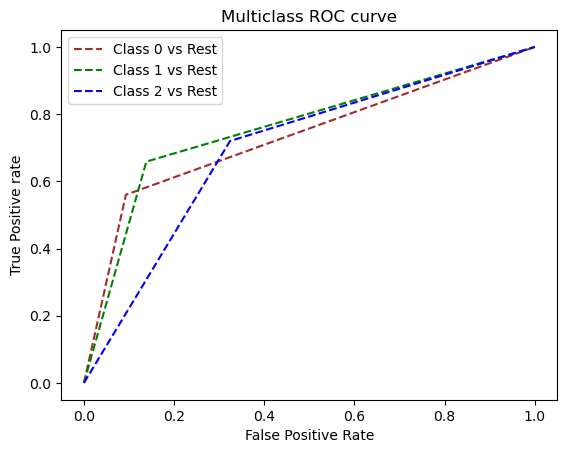

In [77]:
#to build the DecisionTreeClassifier model with random sampling

from sklearn.tree import DecisionTreeClassifier

#Create an object for model

ModelDT=DecisionTreeClassifier()
#class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None,
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
#random_state=None, max_leaf_nodes=None,min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

#train the model

ModelDT.fit(x_train,y_train)

#predict the model with test dataset

y_pred=ModelDT.predict(x_test)
y_pred_prob=ModelDT.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# Random Forest Classifier

[[ 3522   332  1267]
 [   14  6413  1814]
 [ 1541  1777 12487]]
Print Class: 0
TP=3522, FN=1599, TN=22491, FP=1555
Accuracy: 0.892
Precision: 0.694
Sensitivity: 0.688
F1-Score: 0.691
Specificity: 0.935
Balanced Accuracy: 0.812
MCC: 0.625

Print Class: 1
TP=6413, FN=1828, TN=18817, FP=2109
Accuracy: 0.865
Precision: 0.753
Sensitivity: 0.778
F1-Score: 0.765
Specificity: 0.899
Balanced Accuracy: 0.838
MCC: 0.671

Print Class: 2
TP=12487, FN=3318, TN=10281, FP=3081
Accuracy: 0.781
Precision: 0.802
Sensitivity: 0.79
F1-Score: 0.796
Specificity: 0.769
Balanced Accuracy: 0.78
MCC: 0.559

Overall Performance Prediction:
Accuracy: 84.6%
Precision: 74.9667%
Recall or Sensitivity: 75.2%
F1-Score: 0.7507
Specificity or True Nagative Rate: 86.7667%
Balanced Accuracy: 81.0%

MCC: 0.6183

roc_auc_score: 0.896


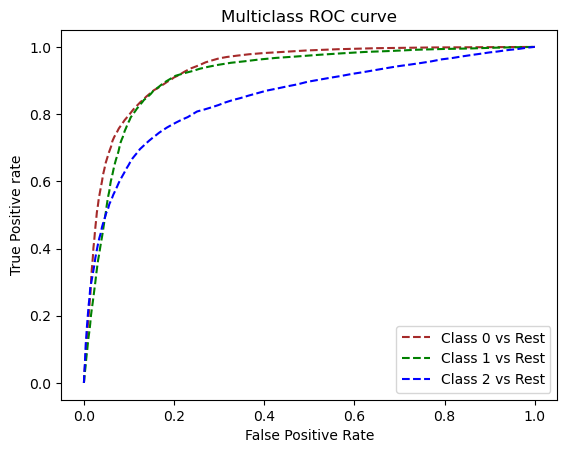

In [78]:
#to build the RandomForestClassifier model with random sampling

from sklearn.ensemble import RandomForestClassifier

#Create an object for model

ModelRF=RandomForestClassifier()

#train the model with train data

ModelRF.fit(x_train,y_train)

#predict the model with test dataset

y_pred=ModelRF.predict(x_test)
y_pred_prob=ModelRF.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# Extra Tree Classifier

[[ 3217   322  1225]
 [   21  6116  1859]
 [ 1839  2084 12484]]
Print Class: 0
TP=3217, FN=1547, TN=22543, FP=1860
Accuracy: 0.883
Precision: 0.634
Sensitivity: 0.675
F1-Score: 0.654
Specificity: 0.924
Balanced Accuracy: 0.8
MCC: 0.584

Print Class: 1
TP=6116, FN=1880, TN=18765, FP=2406
Accuracy: 0.853
Precision: 0.718
Sensitivity: 0.765
F1-Score: 0.741
Specificity: 0.886
Balanced Accuracy: 0.826
MCC: 0.639

Print Class: 2
TP=12484, FN=3923, TN=9676, FP=3084
Accuracy: 0.76
Precision: 0.802
Sensitivity: 0.761
F1-Score: 0.781
Specificity: 0.758
Balanced Accuracy: 0.76
MCC: 0.516

Overall Performance Prediction:
Accuracy: 83.2%
Precision: 71.8%
Recall or Sensitivity: 73.3667%
F1-Score: 0.7253
Specificity or True Nagative Rate: 85.6%
Balanced Accuracy: 79.5333%

MCC: 0.5797

roc_auc_score: 0.882


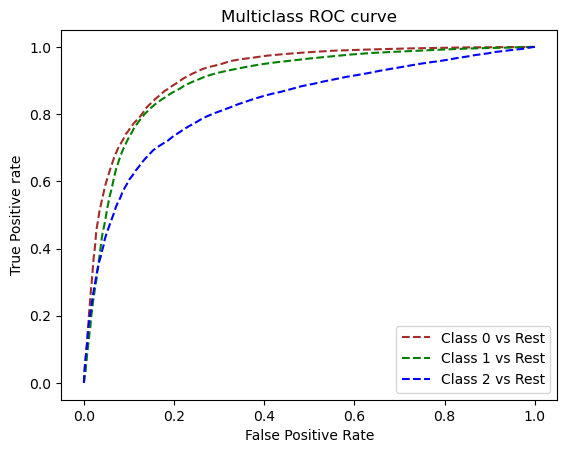

In [79]:
# To build the 'ExtraTreesClassifier' model with random sampling

from sklearn.ensemble import ExtraTreesClassifier

# Create an object for Extra Trees Classifier

ModelET = ExtraTreesClassifier()

# Train the model with train data

ModelET.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelET.predict(x_test)
y_pred_prob = ModelET.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# KNN Algorithm



[[ 2542   806  2153]
 [  470  4645  3120]
 [ 2065  3071 10295]]
Print Class: 0
TP=2542, FN=2959, TN=21131, FP=2535
Accuracy: 0.812
Precision: 0.501
Sensitivity: 0.462
F1-Score: 0.481
Specificity: 0.893
Balanced Accuracy: 0.678
MCC: 0.366

Print Class: 1
TP=4645, FN=3590, TN=17055, FP=3877
Accuracy: 0.744
Precision: 0.545
Sensitivity: 0.564
F1-Score: 0.554
Specificity: 0.815
Balanced Accuracy: 0.69
MCC: 0.375

Print Class: 2
TP=10295, FN=5136, TN=8463, FP=5273
Accuracy: 0.643
Precision: 0.661
Sensitivity: 0.667
F1-Score: 0.664
Specificity: 0.616
Balanced Accuracy: 0.642
MCC: 0.283

Overall Performance Prediction:
Accuracy: 73.3%
Precision: 56.9%
Recall or Sensitivity: 56.4333%
F1-Score: 0.5663
Specificity or True Nagative Rate: 77.4667%
Balanced Accuracy: 67.0%

MCC: 0.3413

roc_auc_score: 0.749


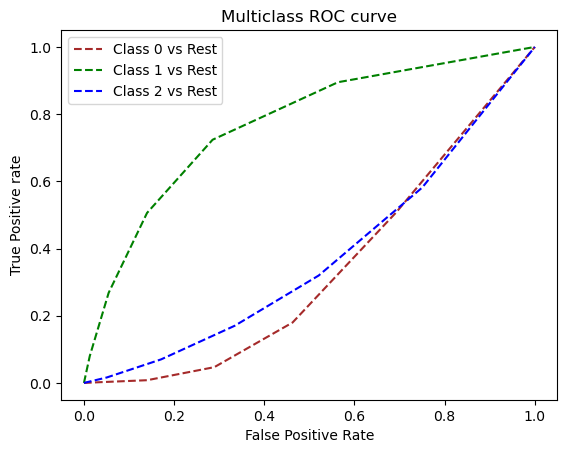

In [80]:
# To build the KNN model with random sampling

from sklearn.neighbors import KNeighborsClassifier

# Create an object for model

ModelKNN  = KNeighborsClassifier()

# Train the model with training data

ModelKNN = ModelKNN.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelKNN.predict(x_test)
y_pred_prob = ModelKNN.predict_proba(x_test)

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

#
# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# NaiveBayes

[[ 1293   555  1719]
 [  243  4936  3355]
 [ 3541  3031 10494]]
Print Class: 0
TP=1293, FN=2274, TN=21816, FP=3784
Accuracy: 0.792
Precision: 0.255
Sensitivity: 0.362
F1-Score: 0.299
Specificity: 0.852
Balanced Accuracy: 0.607
MCC: 0.185

Print Class: 1
TP=4936, FN=3598, TN=17047, FP=3586
Accuracy: 0.754
Precision: 0.579
Sensitivity: 0.578
F1-Score: 0.579
Specificity: 0.826
Balanced Accuracy: 0.702
MCC: 0.405

Print Class: 2
TP=10494, FN=6572, TN=7027, FP=5074
Accuracy: 0.601
Precision: 0.674
Sensitivity: 0.615
F1-Score: 0.643
Specificity: 0.581
Balanced Accuracy: 0.598
MCC: 0.193

Overall Performance Prediction:
Accuracy: 71.5667%
Precision: 50.2667%
Recall or Sensitivity: 51.8333%
F1-Score: 0.507
Specificity or True Nagative Rate: 75.3%
Balanced Accuracy: 63.5667%

MCC: 0.261

roc_auc_score: 0.708


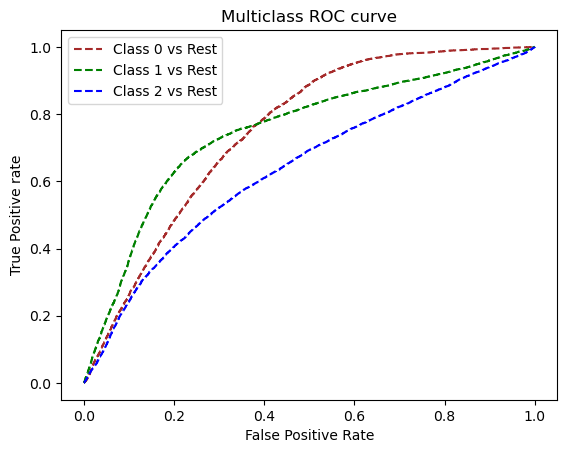

In [81]:
# Training the Naive Bayes model (GaussianNB) on the Training set

from sklearn.naive_bayes import GaussianNB

modelGNB = GaussianNB(priors=None, var_smoothing=1e-09)

# Fit the model with train data

modelGNB.fit(x_train,y_train)

# Predict the model with test data set

y_pred = modelGNB.predict(x_test)
y_pred_prob = modelGNB.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix in sklearn

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from math import sqrt

print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

# Actual and predicted classes

lst_actual_class = y_test
lst_predicted_class = y_pred
lst_predicted_prob_class = y_pred_prob

# Class = Label 0-2

lst_classes = [0, 1, 2]

# Compute multi-class confusion matrix

arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results

model_acc = [];
model_recall = [];
model_prec = [];
model_fscore = [];
model_spec = [];
model_bal_acc = [];
model_mcc = [];
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Print Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fn = arr_data[0][1]
    tn = arr_data[0][0]
    fp = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    model_acc.append(accuracy);
    model_prec.append(precision);
    model_recall.append(sensitivity);
    model_fscore.append(f1Score);
    model_spec.append(specificity);
    model_bal_acc.append(balanced_accuracy);
    model_mcc.append(MCC);

    print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
    print("Accuracy: {0}".format(accuracy));    # Accuracy score
    print("Precision: {0}".format(precision)); # Precision score
    print("Sensitivity: {0}".format(sensitivity)); # Recall score
    print("F1-Score: {0}".format(f1Score)); # F1 score
    print("Specificity: {0}".format(specificity)); # True Nagative Rate
    print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
    print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

from statistics import mean
import math

print("Overall Performance Prediction:");
print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
print("MCC: {0}\n".format(round(mean(model_mcc), 4)))

# ROC curve for Multi classes

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,i], pos_label=i)

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))



#-----------------------------------------------------------------------------------------------------------------------------------------------------

# All Classification Models

In [83]:
# Load the CUSTOMER CHURN PROBLEM dataset

EMResults= pd.read_csv(r"D:\INTERN SHIP\EMResults.csv",header=0)


# Display first 5 records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
[[  442   144   429]
 [  217  3201  2184]
 [ 4418  5177 12955]]
Print Class: 0
TP=442, FN=573, TN=23517, FP=4635
Accuracy: 0.821
Precision: 0.087
Sensitivity: 0.435
F1-Score: 0.145
Specificity: 0.835
Balanced Accuracy: 0.635
MCC: 0.131

Print Class: 1
TP=3201, FN=2401, TN=18244, FP=5321
Accuracy: 0.735
Precision: 0.376
Sensitivity: 0.571
F1-Score: 0.453
Specificity: 0.774
Balanced Accuracy: 0.672
MCC: 0.299

Print Class: 2
TP=12955, FN=9595, TN=4004, FP=2613
Accuracy: 0.581
Precision: 0.832
Sensitivity: 0.575
F1-Score: 0.68
Specificity: 0.605
Balanced Accuracy: 0.59
MCC: 0.151

Overall Performance Prediction:
Accuracy: 71.2333%
Precision: 43.1667%
Recall or Sensitivity: 52.7%
F1-Score: 0.426
Specificity or True Nagative Rate: 73.8%
Balanced Accuracy: 63.2333%

MCC: 0.1937

roc_auc_score: 0.693
-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
[[ 2861   386  1879]


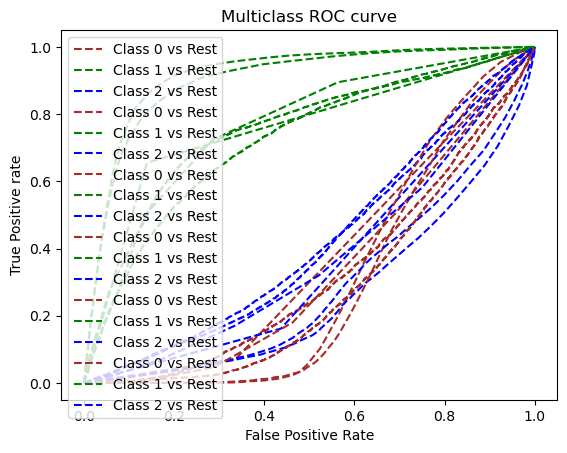

In [84]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDT = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGNB = GaussianNB()
#ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDT, ModelRF, ModelET,ModelKNN, ModelGNB]
for models in MM:

    # Train the model training dataset

    models.fit(x_train, y_train)

    # Prediction the model with test dataset

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred


    # confusion matrix in sklearn

    from sklearn.metrics import multilabel_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from math import sqrt

    print(confusion_matrix(y_pred, y_test)) # Verticle is actual values & horizontal is predicted values

    # Actual and predicted classes

    lst_actual_class = y_test
    lst_predicted_class = y_pred
    lst_predicted_prob_class = y_pred_prob

    # Class = Label 0-12

    lst_classes = [0, 1, 2]

    # Compute multi-class confusion matrix

    arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

    # Temp store results

    model_acc = [];
    model_recall = [];
    model_prec = [];
    model_fscore = [];
    model_spec = [];
    model_bal_acc = [];
    model_mcc = [];
    for no_class in range(len(lst_classes)):
        arr_data = arr_out_matrix[no_class];
        print("Print Class: {0}".format(no_class));

        tp = arr_data[1][1]
        fn = arr_data[0][1]
        tn = arr_data[0][0]
        fp = arr_data[1][0]

        sensitivity = round(tp/(tp+fn), 3);
        specificity = round(tn/(tn+fp), 3);
        accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
        balanced_accuracy = round((sensitivity+specificity)/2, 3);

        precision = round(tp/(tp+fp), 3);
        f1Score = round((2*tp/(2*tp + fp + fn)), 3);

        mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
        MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
        model_acc.append(accuracy);
        model_prec.append(precision);
        model_recall.append(sensitivity);
        model_fscore.append(f1Score);
        model_spec.append(specificity);
        model_bal_acc.append(balanced_accuracy);
        model_mcc.append(MCC);

        print("TP={0}, FN={1}, TN={2}, FP={3}".format(tp, fn, tn, fp));
        print("Accuracy: {0}".format(accuracy));    # Accuracy score
        print("Precision: {0}".format(precision)); # Precision score
        print("Sensitivity: {0}".format(sensitivity)); # Recall score
        print("F1-Score: {0}".format(f1Score)); # F1 score
        print("Specificity: {0}".format(specificity)); # True Nagative Rate
        print("Balanced Accuracy: {0}".format(balanced_accuracy)); # Balance accuracy score
        print("MCC: {0}\n".format(MCC)); # Matthews Correlation Coefficient

# OVERALL - FINAL PREDICTION PERFORMANCE

# importing mean()

    from statistics import mean
    import math

    print("Overall Performance Prediction:");
    print("Accuracy: {0}%".format(round(mean(model_acc)*100, 4)));
    print("Precision: {0}%".format(round(mean(model_prec)*100, 4)));
    print("Recall or Sensitivity: {0}%".format(round(mean(model_recall)*100, 4)));
    print("F1-Score: {0}".format(round(mean(model_fscore), 4)));
    print("Specificity or True Nagative Rate: {0}%".format(round(mean(model_spec)*100, 4)));
    print("Balanced Accuracy: {0}%\n".format(round(mean(model_bal_acc)*100, 4)));
    print("MCC: {0}\n".format(round(mean(model_mcc), 4)))


    # ROC curve for Multi classes
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 3

    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(lst_actual_class, lst_predicted_prob_class[:,1], pos_label=i)

    # plotting
    plt.plot(fpr[0], tpr[0], linestyle='--',color='brown', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')

    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')

# ROC AUC score - one-vs-one (OvO) algorithm computes the average of the ROC AUC scores for each class against
# all other classes.

    print('roc_auc_score:', round(roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo',
                                            average='weighted'),3))
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn,
               'False_Positive': fp,
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(lst_actual_class, lst_predicted_prob_class, multi_class='ovo', average='weighted'),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)

In [87]:
EMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),12955,9595,2613,4004,0.581,0.832,0.575,0.680,0.605,0.151,0.692646,0.590
1,DecisionTreeClassifier(),11169,4408,4399,9191,0.698,0.717,0.717,0.717,0.676,0.393,0.728609,0.696
2,"(DecisionTreeClassifier(max_features='sqrt', r...",12482,3294,3086,10305,0.781,0.802,0.791,0.796,0.770,0.560,0.897752,0.780
3,"(ExtraTreeClassifier(random_state=880972287), ...",12469,3928,3099,9671,0.759,0.801,0.760,0.780,0.757,0.515,0.881467,0.758
4,KNeighborsClassifier(),10295,5136,5273,8463,0.643,0.661,0.667,0.664,0.616,0.283,0.748691,0.642
5,GaussianNB(),10494,6572,5074,7027,0.601,0.674,0.615,0.643,0.581,0.193,0.707870,0.598


In [88]:
y_pred=ModelRF.predict(x_test)

In [89]:
#display the final results

Results=pd.DataFrame({'Credit_Score_A':y_test,'Credit_Score_P':y_pred})

#merge two dataframes on index of both the datafames

ResultsFinal=CSdata_01_BK.merge(Results,left_index=True,right_index=True)

#display 5 records randomly

ResultsFinal.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Score_A,Credit_Score_P
74126,0x1c854,CUS_0x1bbb,July,Carrick Mollenkampj,26,571-52-6747,Musician,13164.265,1034.022083,6,4,8,7,"Credit-Builder Loan, Debt Consolidation Loan, ...",27,18,13.24,6.0,Standard,697.28,29.198174,NaN,Yes,64.619127,39.737738079044746,Low_spent_Medium_value_payments,279.0453433366217,Standard,2,2
81680,0x1f49a,CUS_0x9730,January,George Georgiopoulosp,31,637-99-8103,Teacher,55246.77,4390.897500,4,4,20,2,"Debt Consolidation Loan, and Debt Consolidatio...",29,8,11.19,4.0,Standard,1818.27,31.725166,5 Years and 4 Months,Yes,71.205606,146.0064251800163,High_spent_Medium_value_payments,471.87771849061266,Poor,1,1
71838,0x1baec,CUS_0x59a5,July,Whitev,28,621-30-0642,Engineer,78056.04,6384.670000,7,5,17,1,Not Specified,15,14,16.6,10.0,_,248.71,38.759491,18 Years and 11 Months,Yes,44.088374,69.95835343978389,High_spent_Large_value_payments,764.4202724934033,Standard,2,2
58444,0x16c72,CUS_0x3e6b,May,Adinarayanx,22,#F%$D@*&8,Writer,16140.325,1309.027083,4,4,9,3,"Not Specified, Not Specified, and Debt Consoli...",0,13,4.07,6.0,Standard,382.28,31.654158,21 Years and 7 Months,Yes,38.458943,115.19080376762597,Low_spent_Small_value_payments,267.2529613273729,Standard,2,2
23172,0x9dc6,CUS_0x746e,May,Drivert,54,551-33-8461,Scientist,78401.25,NaN,3,3,17,3,"Auto Loan, Debt Consolidation Loan, and Not Sp...",24,8,10.97,0.0,Standard,444.02,31.477314,18 Years and 5 Months,No,131.993804,500.0894296737066,Low_spent_Medium_value_payments,295.46051587003797,Standard,2,2
